# Data Visualisation II - Seaborn

Seaborn is a Python data visualization library based on matplotlib which provides a high-level interface for drawing pretty and very informative statistical graphics.

Likewise, I strongly recommend having a look at https://seaborn.pydata.org/ for documentation and examples.
## Installation

For those of you not using JupyterNotebook:
## Anaconda distribution:
    conda install seaborn
## Python-pip:
    pip install seaborn
    
    
Importing all the libraries we saw until now:

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_bill = pd.read_csv('data_restaurant.csv',sep=',',index_col=0)
data_bill

,Total,Tip,Gender,Smoker,Day,Time,Number of guests
0,16.99,1.01,Female,No,Sunday,Night,2
1,10.34,1.66,Male,No,Sunday,Night,3
2,21.01,3.50,Male,No,Sunday,Night,3
3,23.68,3.31,Male,No,Sunday,Night,2
4,24.59,3.61,Female,No,Sunday,Night,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Saturday,Night,3
240,27.18,2.00,Female,Yes,Saturday,Night,2
241,22.67,2.00,Male,Yes,Saturday,Night,2
242,17.82,1.75,Male,No,Saturday,Night,2


# Distribution Plots

## distplot

Combination of kde (kernel density estimation) and bar plots. Kde plots show us the probability distribution of the data.

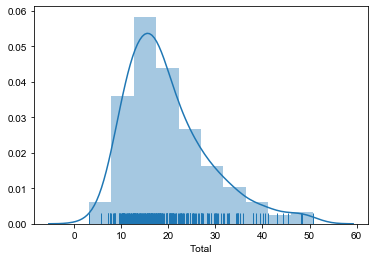

In [3]:
sns.distplot(data_bill['Total'],bins=10,kde=True,rug=True)
#color='deepskyblue'

sns.set_style('whitegrid')

#for other color tags:
#url = 'https://python-graph-gallery.com/100-calling-a-color-with-seaborn/'

#import webbrowser
#webbrowser.open(url)

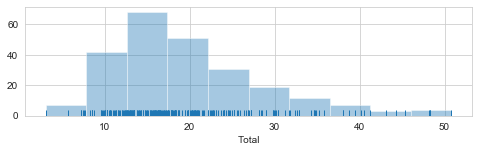

In [4]:
fig,ax = plt.subplots(figsize=(8,2))

sns.distplot(data_bill['Total'],bins=10,kde=False,rug=True,ax=ax)

## jointplot

 Combines two distplots for bivariate data.

default kind is 'scatter'
 
'kde','hex','reg' options are also available.

####  kind -- figure types
 → kde kernel density estimation
 
 → reg linear regression
 
 → hex, resid, scatter 



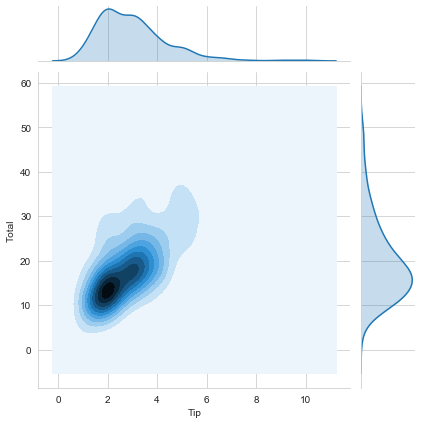

In [5]:
sns.jointplot('Tip','Total',data=data_bill,kind='kde')

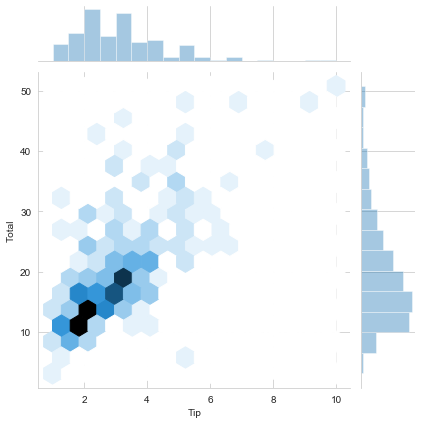

In [6]:
sns.jointplot('Tip','Total',data=data_bill,kind='hex')

## pairplot



Pairplot will identify and plot pairwise relationships (for numerical data) for all the columns in the dataset. Categorical data is distinguished by the hue option.

 diagonal plot type-->  diag_kind = 'hist' or 'kde'
 
 non-diagonal plot type     -->  kind = 'scatter' or 'reg'

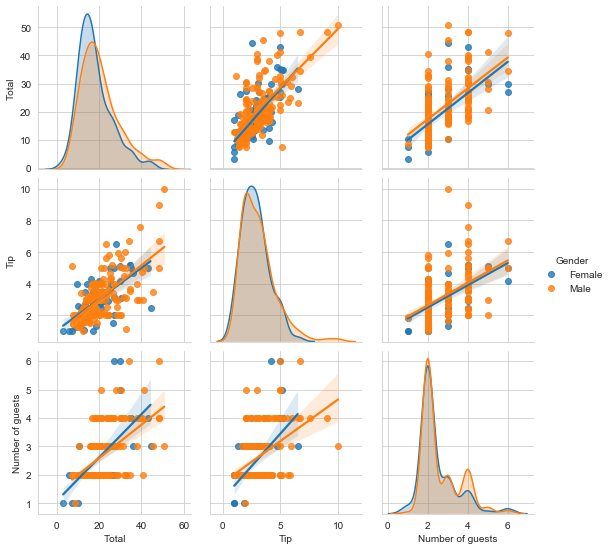

In [7]:
#sns.pairplot(data_bill)
sns.pairplot(data_bill,diag_kind='kde',kind='reg',hue='Gender')
#sns.pairplot(data_bill, hue='Gender', kind='reg', diag_kind='auto')

## rug plot

Takes its name form the fact that it actually looks like a rug. Places a tick representing every data point in the univariate distribution of a data. Kde plots are based on rug plots.


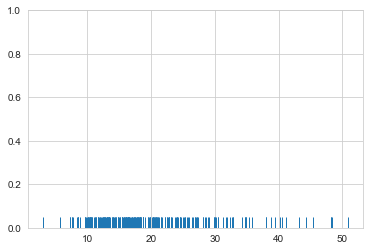

In [8]:
sns.rugplot(data_bill['Total'])

# Categorical Plots

In [9]:
data_bill.head()

,Total,Tip,Gender,Smoker,Day,Time,Number of guests
0,16.99,1.01,Female,No,Sunday,Night,2
1,10.34,1.66,Male,No,Sunday,Night,3
2,21.01,3.50,Male,No,Sunday,Night,3
3,23.68,3.31,Male,No,Sunday,Night,2
4,24.59,3.61,Female,No,Sunday,Night,4


## bar plot

Bar plot gives us numerical information for a categorical data type.

estimator --> What kind of a numerical property of the category to display. By default it's set to mean but agg functions such as np.std, np.max, np.min can also be used.

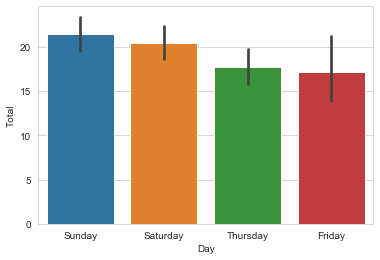

In [10]:
sns.barplot(x='Day',y='Total',data=data_bill)

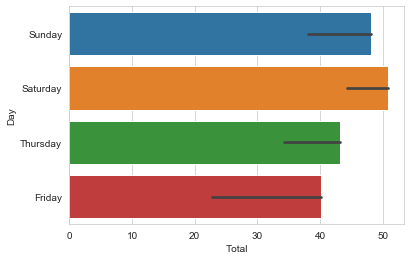

In [11]:
sns.barplot(x='Total',y='Day',data=data_bill,estimator=np.max)

## count plot
Similary to bar plot but instead aggregated information about the data, it displays directly the count of that category in the data.

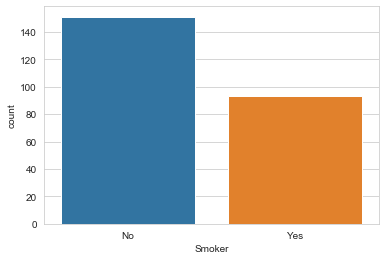

In [12]:
sns.countplot(x='Smoker',data=data_bill)

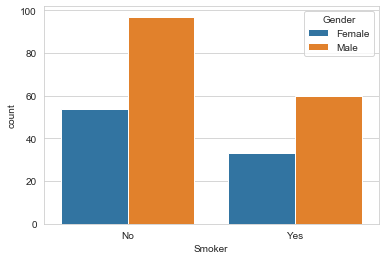

In [13]:
sns.countplot(x='Smoker',data=data_bill,hue='Gender')

## box plot
It is used to show the quantitative distribution of a category. The box represents the quartiles of the category, whereas the whiskers represent the distribution of the rest of the data. The points are called the outliers which represent extreme points (meaning points very distant from rest of the data).

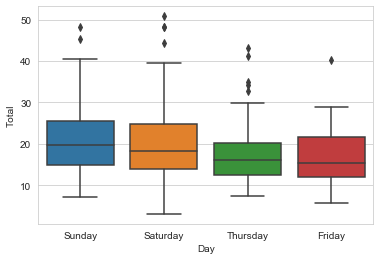

In [14]:
sns.boxplot(x='Day',y='Total',data=data_bill)

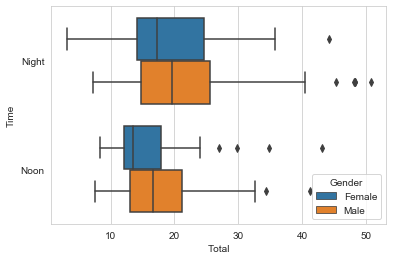

In [15]:
sns.boxplot(x='Total',y='Time',data=data_bill,hue='Gender')

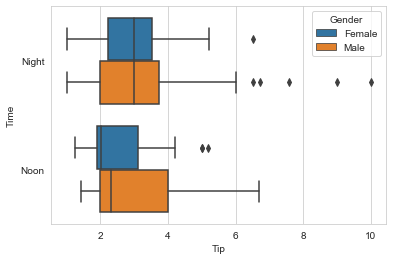

In [16]:
sns.boxplot(x='Tip',y='Time',data=data_bill,hue='Gender')

## violin plot

Violin serves a similar purpose to box plot but uses kde to represent the distribution of the data.

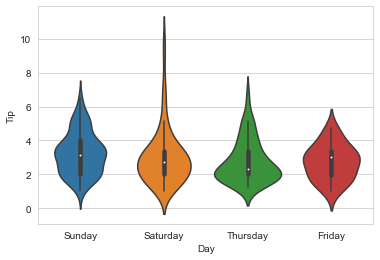

In [17]:
sns.violinplot(x='Day',y='Tip',data=data_bill)

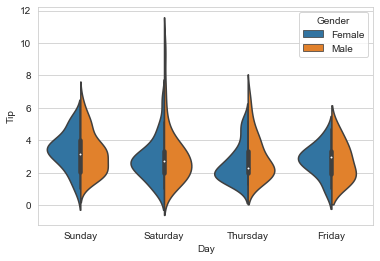

In [18]:
#sns.violinplot(x='Day',y='Tip',data=data_bill,hue='Gender')
sns.violinplot(x='Day',y='Tip',data=data_bill,hue='Gender',split=True)

## strip ve swarm plot

Strip plot comes in handy (compared to box and violin plot) when we want to see both the distribution of the data and every point in the data. Every data in the dataset is represented with a point forming a strip.



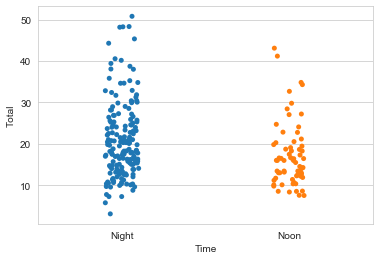

In [19]:
sns.stripplot(x='Time',y='Total',data=data_bill)

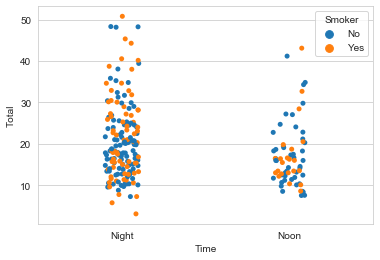

In [20]:
sns.stripplot(x='Time',y='Total',data=data_bill,jitter=True,hue='Smoker')


Swarm plot is similator strip plot however it tends to widen along the category axis where the data accumulates so that points do not overlap. It becomes widest where the data is densely located. It is more useful to see the distribution in dense areas.

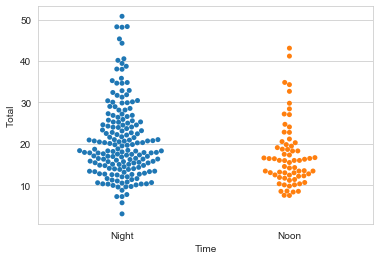

In [21]:
sns.swarmplot(x='Time',y='Total',data=data_bill)

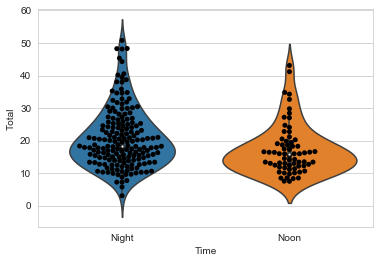

In [22]:
sns.swarmplot(x='Time',y='Total',data=data_bill,color='black')
sns.violinplot(x='Time',y='Total',data=data_bill)

## catplot
catplot is a general plot type for categorical data. It is necessary to provide the 'kind' to control the type of the categorical plot we get.

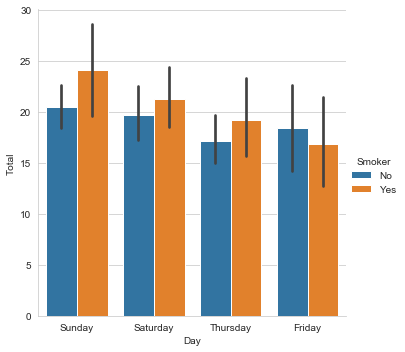

In [23]:
sns.catplot(x='Day',y='Total',data=data_bill,kind='bar',hue='Smoker')

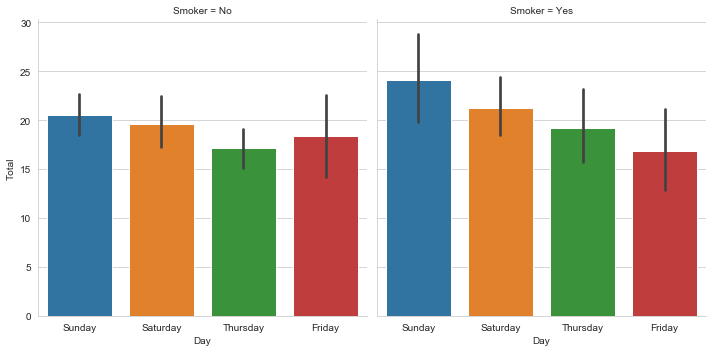

In [24]:
sns.catplot(x='Day',y='Total',data=data_bill,kind='bar',col='Smoker')

# Matrix Plots

Matrix plots display the data in the format of a colored matrix. 

In [25]:
flight_data = sns.load_dataset('flights')
flight_data

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [26]:
flight_data = flight_data.pivot(index='month',columns='year',values='passengers')

flight_data

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


## heatmap

Heatmap creates a colored matrix of a data which is already in matrix format.

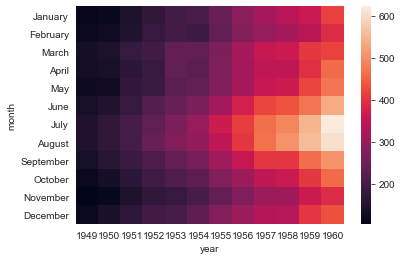

In [27]:
sns.heatmap(data=flight_data)

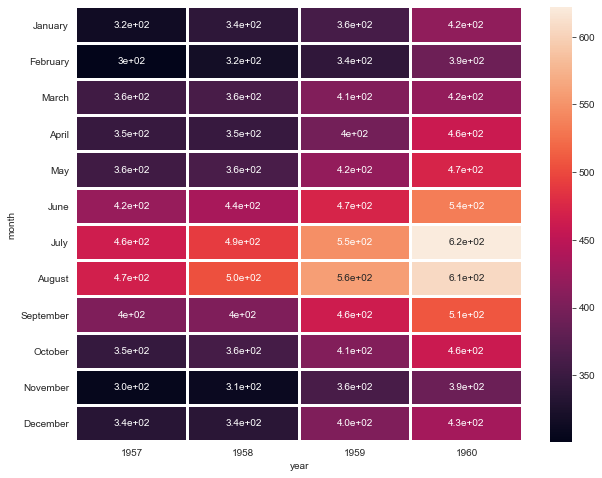

In [28]:
fig,ax = plt.subplots(figsize=(10,8))

sns.heatmap(data=flight_data.loc[:,'1957':],annot=True,linecolor='white',linewidths=2)

## clustermap

Clustermap creates a hierarchical relationship to the heatmap plot.

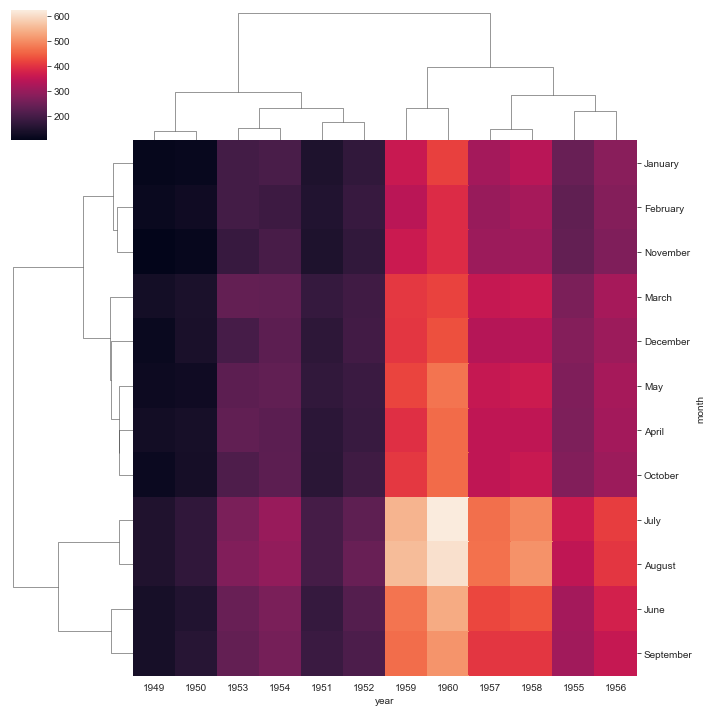

In [29]:
sns.clustermap(data=flight_data)

# GRID PLOTS

Grid plots allow us to plot multiple plots in columns and rows

## PairGrid

Provides the possibility to plot together multiple plots. A more flexible version of pair plot. 

In [30]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [31]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

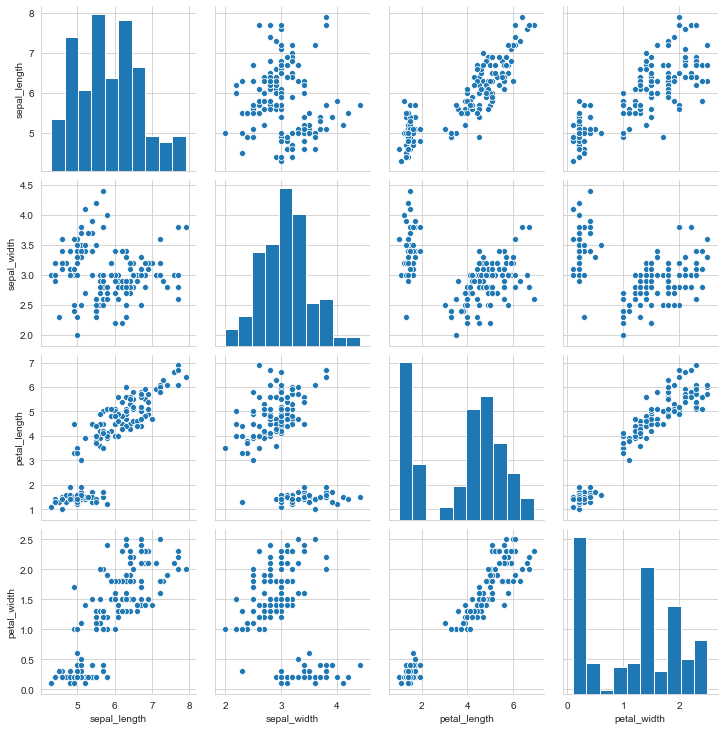

In [32]:
sns.pairplot(iris)

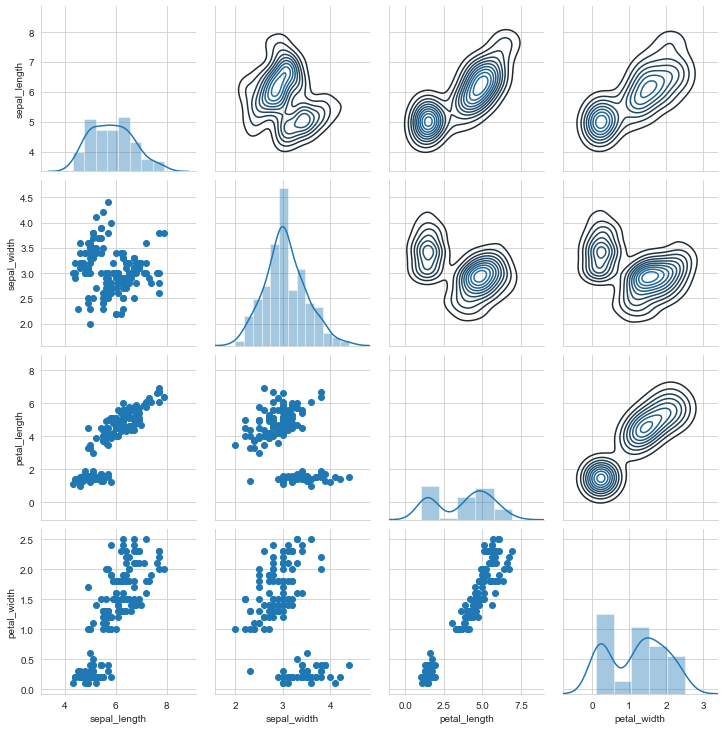

In [33]:
iris_grid = sns.PairGrid(iris)

iris_grid.map_diag(sns.distplot)
iris_grid.map_lower(plt.scatter)
iris_grid.map_upper(sns.kdeplot)

## FacetGrid
The most important difference of FacetGrid compared to pairplot and pairgrid is that we can select the columns to visualize.

In [34]:
data_bill.head()

,Total,Tip,Gender,Smoker,Day,Time,Number of guests
0,16.99,1.01,Female,No,Sunday,Night,2
1,10.34,1.66,Male,No,Sunday,Night,3
2,21.01,3.50,Male,No,Sunday,Night,3
3,23.68,3.31,Male,No,Sunday,Night,2
4,24.59,3.61,Female,No,Sunday,Night,4


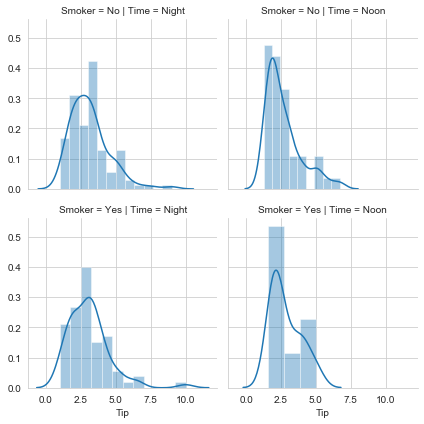

In [35]:
bill_facet = sns.FacetGrid(data_bill,row='Smoker',col='Time')

bill_facet.map(sns.distplot,'Tip',kde=True)

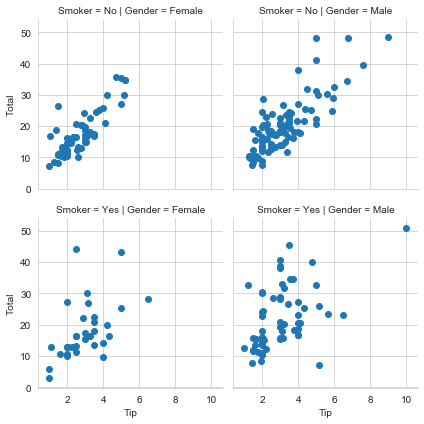

In [36]:
bill_facet2 = sns.FacetGrid(data_bill,row='Smoker',col='Gender')

bill_facet2.map(plt.scatter,'Tip','Total')

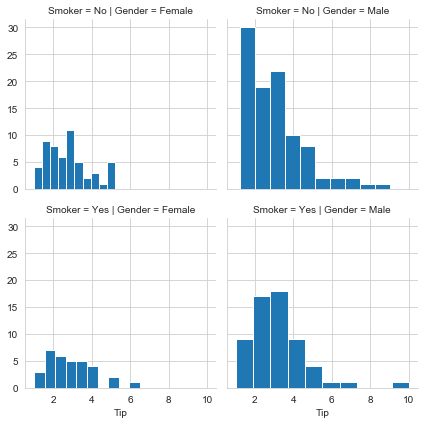

In [37]:
bill_facet2 = sns.FacetGrid(data_bill,row='Smoker',col='Gender')

bill_facet2.map(plt.hist,'Tip')

## lmplot

Combination of linear regression and FacetGrid plots.

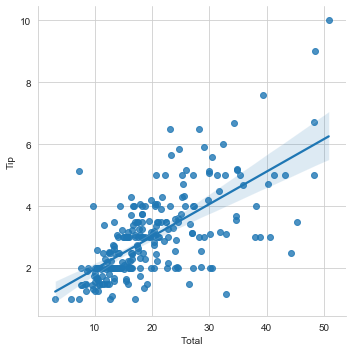

In [38]:
sns.lmplot(x='Total',y='Tip',data=data_bill)

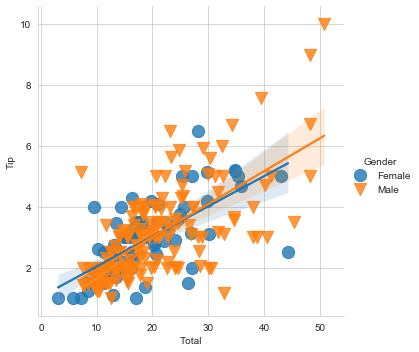

In [39]:
sns.lmplot(x='Total',y='Tip',data=data_bill,hue='Gender',
           markers=['o','v'],scatter_kws={'s':150})

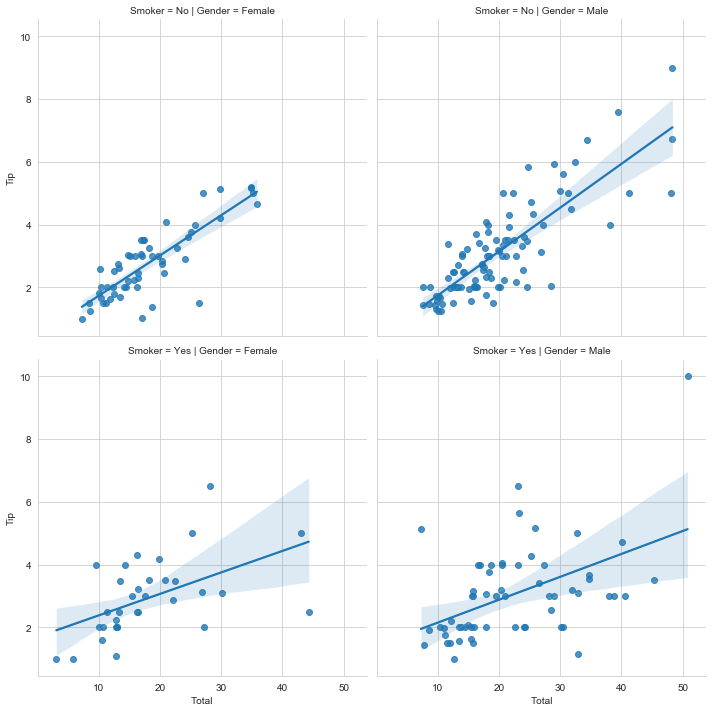

In [40]:
sns.lmplot(x='Total',y='Tip',data=data_bill,row='Smoker',col='Gender')

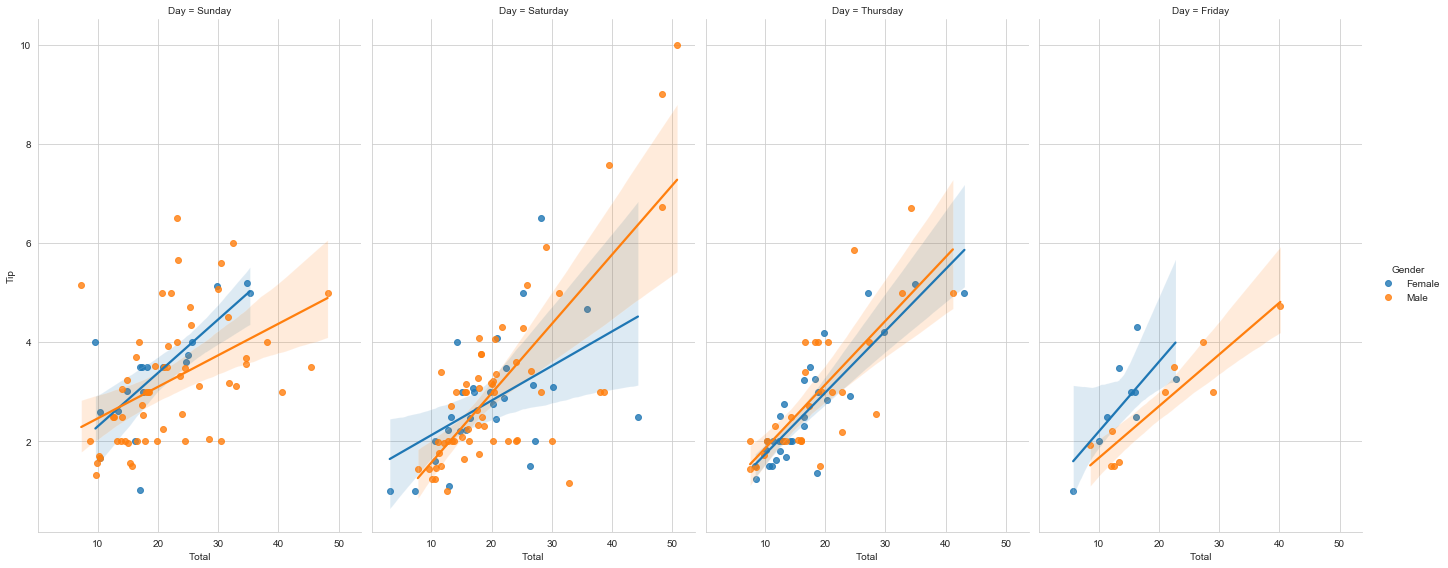

In [41]:
sns.lmplot(x='Total',y='Tip',data=data_bill,col='Day',hue='Gender',
          aspect=0.6,height=8)

# Editing Plot Properties

In [42]:
data_bill.head()

,Total,Tip,Gender,Smoker,Day,Time,Number of guests
0,16.99,1.01,Female,No,Sunday,Night,2
1,10.34,1.66,Male,No,Sunday,Night,3
2,21.01,3.50,Male,No,Sunday,Night,3
3,23.68,3.31,Male,No,Sunday,Night,2
4,24.59,3.61,Female,No,Sunday,Night,4


### Axis labels

Text(0.5, 1.0, 'Total amount with respect to days')

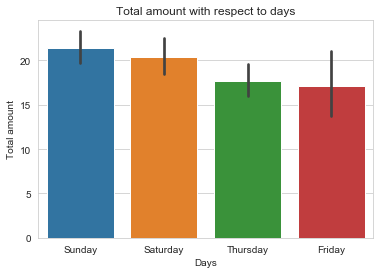

In [43]:
f = sns.barplot(x='Day',y='Total',data=data_bill)

f.set_xlabel('Days')
f.set_ylabel('Total amount')
f.set_title('Total amount with respect to days')

[Text(0, 0.5, 'Total amount'),
 Text(0.5, 0, 'Days'),
 Text(0.5, 1.0, 'Total amount with respect to days')]

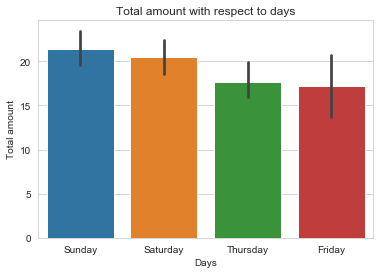

In [44]:
f = sns.barplot(x='Day',y='Total',data=data_bill)

f.set(xlabel='Days',
      ylabel='Total amount',
      title='Total amount with respect to days')

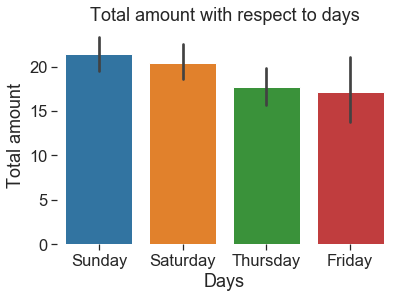

In [45]:
sns.set_style('ticks')
sns.set_context('notebook',font_scale=1.5)            # paper, talk, notebook



f = sns.barplot(x='Day',y='Total',data=data_bill)


f.set(xlabel='Days',
      ylabel='Total amount',
      title='Total amount with respect to days')

sns.despine(left=True,right=True,bottom=True,top=True)

### Plot Size

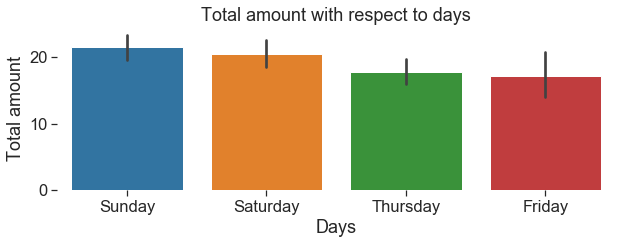

In [46]:
plt.figure(figsize=(10,3))

sns.set_style('ticks')
sns.set_context('notebook',font_scale=1.5)            # paper, talk, notebook

f = sns.barplot(x='Day',y='Total',data=data_bill)

f.set(xlabel='Days',
      ylabel='Total amount',
      title='Total amount with respect to days')



sns.despine(left=True,right=True,bottom=True,top=True)


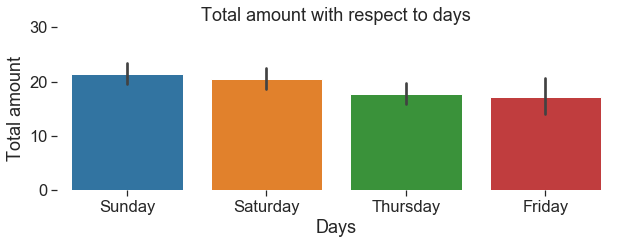

In [47]:
plt.figure(figsize=(10,3))

sns.set_style('ticks')
sns.set_context('notebook',font_scale=1.5)            # paper, talk, notebook

f = sns.barplot(x='Day',y='Total',data=data_bill)

f.set(xlabel='Days',
      ylabel='Total amount',
      title='Total amount with respect to days')


f.set_ylim(0,30)

sns.despine(left=True,right=True,bottom=True,top=True)

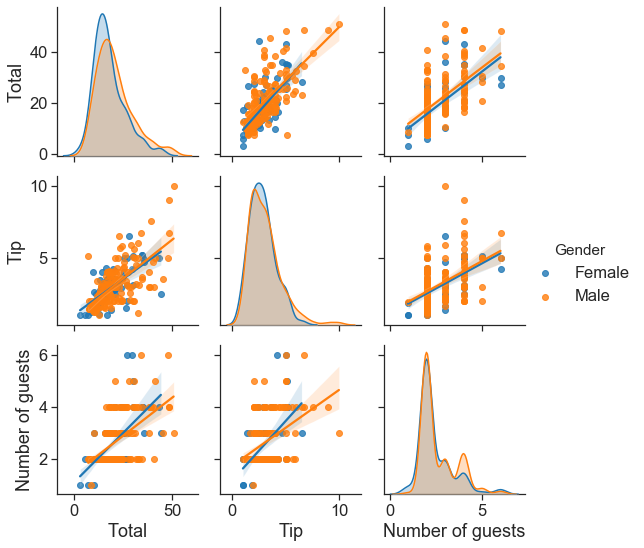

In [48]:
c = sns.pairplot(data_bill,diag_kind='kde',kind='reg',hue='Gender')

c.savefig('pair_plot_bill.png',dpi=300,transparent=True)